# TODO
- Exploit temperature data
- Explore more usable data
- Use both M15 and O15 data
- Exploit regional data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from config import *

,Age,M14,M15,O6,O14,O15,O16
0,-62,0.000000,0.000000,0.002154,0.035203,0.059449,0.000000
1,-52,0.000000,0.002368,0.049548,0.020643,0.099554,0.000000
2,-42,0.008666,0.007328,0.017502,0.010129,0.010383,0.025594
3,-32,0.003736,0.025032,0.019608,0.010045,0.012183,0.008830
4,-22,0.014700,0.045777,0.040944,0.022560,0.048076,0.033579
...,...,...,...,...,...,...,...
1360,13538,0.000000,0.002627,0.000000,0.000000,0.000000,0.000000
1361,13548,0.000000,0.002469,0.000000,0.000000,0.000000,0.000000
1362,13558,0.000000,0.000926,0.000000,0.000000,0.000000,0.000000
1363,13568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,Age,M15
0,-62,0.000000
1,-52,0.002368
2,-42,0.007328
3,-32,0.025032
4,-22,0.045777
...,...,...
1360,13538,0.002627
1361,13548,0.002469
1362,13558,0.000926
1363,13568,0.000000


<Axes: xlabel='Age', ylabel='M15'>

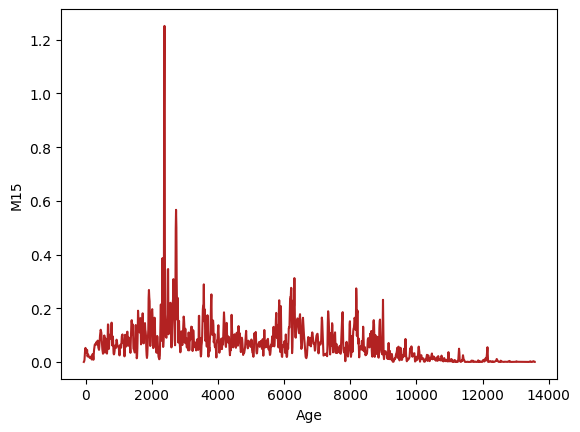

In [2]:
# Extract charcoal data
df_charcoal = pd.read_excel("data/boreal_forest/DATA_ONT_MT_20231124.xlsx", sheet_name="All_sites_char_influx_reechanti")
display(df_charcoal)

# Keep only M15
df_charcoal = df_charcoal[["Age", CHARCOAL_ID]]
display(df_charcoal)

sns.lineplot(df_charcoal, x="Age", y=CHARCOAL_ID, color="firebrick")

In [3]:
df_pollen = pd.read_csv("data/boreal_forest/"+CHARCOAL_ID+"_spec.csv")
df_pollen = df_pollen.rename(columns={"Profondeur": "Depth"}).sort_values(by="Depth", ascending=False)
df_pollen.columns = df_pollen.columns.str.strip()
df_pollen = df_pollen[[c for c in df_pollen.columns if c in FEATURES or c == "Depth"]]
display(df_pollen)

if False:
    df_synth = pd.read_csv("tmp/df_synth.csv")
    df_pollen = pd.merge(df_pollen,df_synth,on="Depth")
    display(df_pollen)

,Depth,Picea,Pinus,Betula,Quercus,Ulmus,Ambrosia,Artemesia,Chenopodiaceae,Cyperaceae,Poaceae
61,1180,39.144050,38.830898,6.889353,1.878914,0.626305,0.313152,1.565762,0.313152,0.939457,2.505219
60,1170,17.559524,54.166667,10.119048,1.190476,2.380952,1.190476,0.595238,1.488095,0.892857,3.273810
59,1160,10.559006,57.142857,12.422360,0.931677,0.000000,3.726708,2.795031,2.173913,0.621118,3.416149
58,1150,13.068182,51.704545,15.909091,0.852273,3.125000,0.568182,2.556818,1.420455,0.568182,5.681818
57,1140,25.793245,31.320368,21.494371,2.456499,2.149437,1.535312,2.763562,0.307062,0.614125,3.991812
...,...,...,...,...,...,...,...,...,...,...,...
4,610,16.694352,55.315615,9.219269,0.996678,0.498339,0.249169,0.996678,0.249169,0.747508,4.235880
3,600,12.147887,52.816901,13.204225,1.848592,0.000000,0.000000,2.112676,0.792254,0.792254,1.584507
2,590,14.005602,59.383753,9.523810,1.120448,0.560224,0.560224,1.960784,0.280112,0.840336,1.400560
1,580,13.897281,62.235650,10.574018,0.604230,0.000000,1.510574,0.906344,0.000000,1.208459,1.208459


In [4]:
df_depth = pd.read_csv("data/boreal_forest/"+CHARCOAL_ID+"_depths.csv", usecols=["depths", "Age"])
df_depth = df_depth.rename(columns={"depths":"Depth"})
display(df_depth)

# Cannot just merge because not all age for all depth and vice versa, need to find the nearest point
nearest_age = []
for target in df_depth["Age"]:
    differences = np.abs(df_charcoal['Age'] - target)
    nearest_index = differences.argsort()[0]
    nearest_age.append(df_charcoal['Age'].iloc[nearest_index])
    #print(f"Nearest value to {target} is {nearest_depth[-1]}")

df_depth["Age"] = nearest_age

display(df_depth)

df = df_charcoal.merge(df_depth, on="Age")
display(df)

df = df.merge(df_pollen, on="Depth")
display(df)

,Depth,Age
0,570,-62
1,580,-7
2,590,143
3,600,335
4,610,561
...,...,...
57,1140,9708
58,1150,9914
59,1160,10129
60,1170,10319


,Depth,Age
0,570,-62
1,580,-12
2,590,138
3,600,338
4,610,558
...,...,...
57,1140,9708
58,1150,9918
59,1160,10128
60,1170,10318


,Age,M15,Depth
0,-62,0.000000,570
1,-12,0.052147,580
2,138,0.016437,590
3,338,0.065690,600
4,558,0.098487,610
...,...,...,...
57,9708,0.002381,1140
58,9918,0.024061,1150
59,10128,0.019621,1160
60,10318,0.026405,1170


,Age,M15,Depth,Picea,Pinus,Betula,Quercus,Ulmus,Ambrosia,Artemesia,Chenopodiaceae,Cyperaceae,Poaceae
0,-62,0.000000,570,16.712329,53.698630,8.219178,1.369863,0.273973,1.369863,1.369863,1.095890,1.095890,1.369863
1,-12,0.052147,580,13.897281,62.235650,10.574018,0.604230,0.000000,1.510574,0.906344,0.000000,1.208459,1.208459
2,138,0.016437,590,14.005602,59.383753,9.523810,1.120448,0.560224,0.560224,1.960784,0.280112,0.840336,1.400560
3,338,0.065690,600,12.147887,52.816901,13.204225,1.848592,0.000000,0.000000,2.112676,0.792254,0.792254,1.584507
4,558,0.098487,610,16.694352,55.315615,9.219269,0.996678,0.498339,0.249169,0.996678,0.249169,0.747508,4.235880
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,9708,0.002381,1140,25.793245,31.320368,21.494371,2.456499,2.149437,1.535312,2.763562,0.307062,0.614125,3.991812
58,9918,0.024061,1150,13.068182,51.704545,15.909091,0.852273,3.125000,0.568182,2.556818,1.420455,0.568182,5.681818
59,10128,0.019621,1160,10.559006,57.142857,12.422360,0.931677,0.000000,3.726708,2.795031,2.173913,0.621118,3.416149
60,10318,0.026405,1170,17.559524,54.166667,10.119048,1.190476,2.380952,1.190476,0.595238,1.488095,0.892857,3.273810


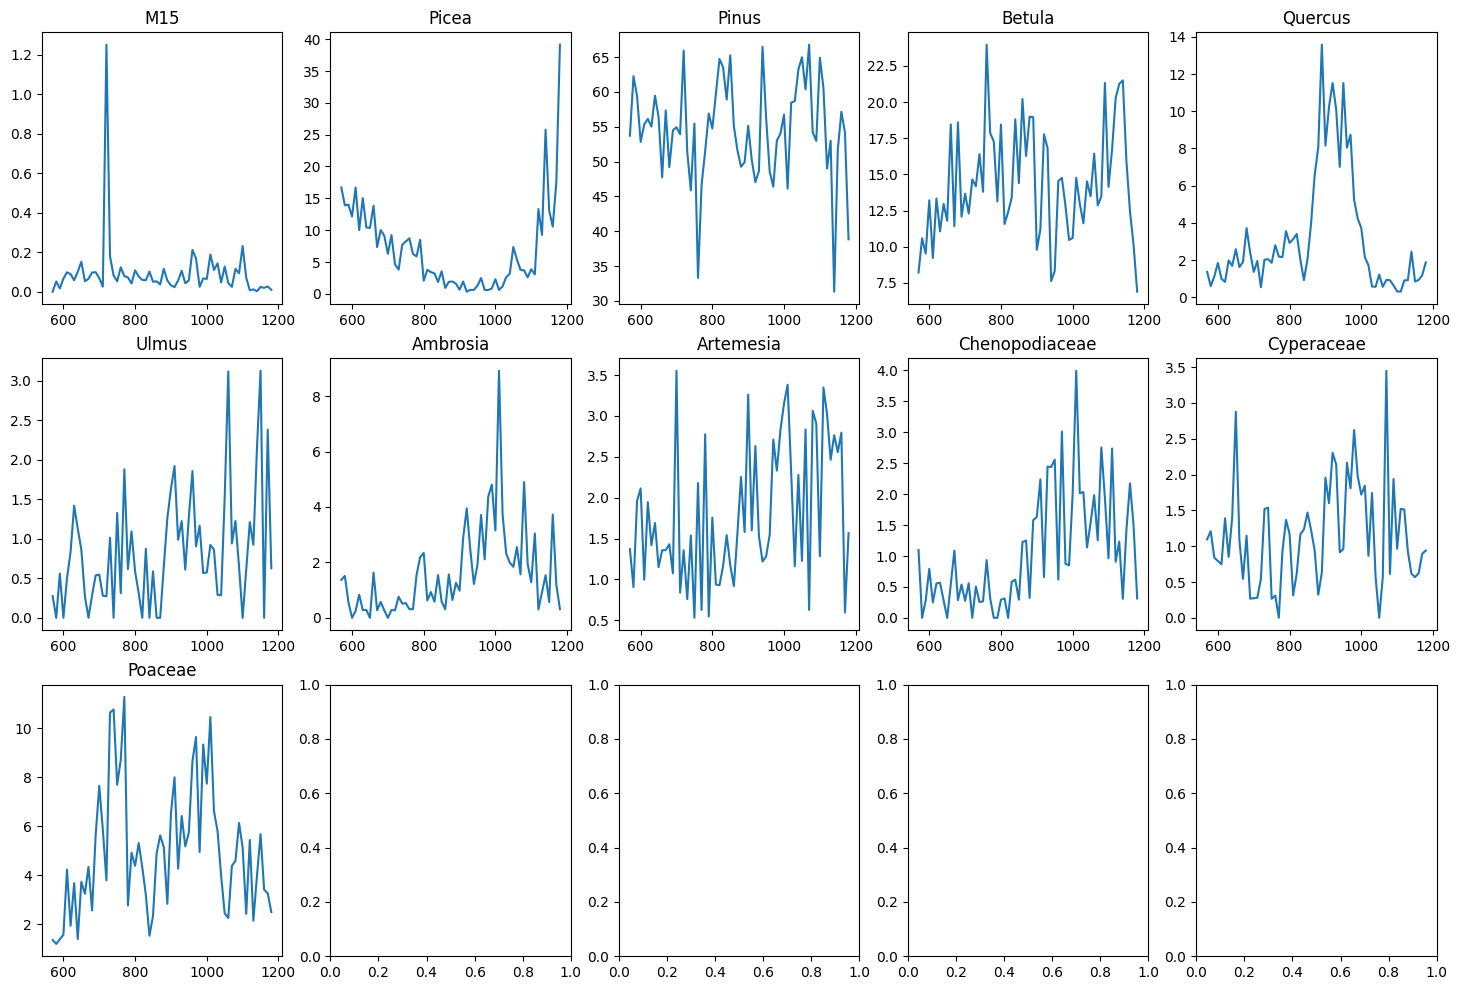

In [5]:
ncols = 5 
nrows = math.ceil(len([col for col in FEATURES]) / ncols)

fig, my_grid = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,12))
fig_id = 0

for col in FEATURES:
    ax = my_grid[int(fig_id / ncols)][fig_id % ncols]
    g = sns.lineplot (data=df, x="Depth", y=col, legend=False, ax=ax)
    ax.set(ylabel="",xlabel="")
    ax.title.set_text(col)

    fig_id += 1

In [6]:
# Clean usable columns
df = df.drop(columns=["Age", "Depth"])

# Remove space from col name
df.columns = df.columns.str.replace(' ', '_')

df

,M15,Picea,Pinus,Betula,Quercus,Ulmus,Ambrosia,Artemesia,Chenopodiaceae,Cyperaceae,Poaceae
0,0.000000,16.712329,53.698630,8.219178,1.369863,0.273973,1.369863,1.369863,1.095890,1.095890,1.369863
1,0.052147,13.897281,62.235650,10.574018,0.604230,0.000000,1.510574,0.906344,0.000000,1.208459,1.208459
2,0.016437,14.005602,59.383753,9.523810,1.120448,0.560224,0.560224,1.960784,0.280112,0.840336,1.400560
3,0.065690,12.147887,52.816901,13.204225,1.848592,0.000000,0.000000,2.112676,0.792254,0.792254,1.584507
4,0.098487,16.694352,55.315615,9.219269,0.996678,0.498339,0.249169,0.996678,0.249169,0.747508,4.235880
...,...,...,...,...,...,...,...,...,...,...,...
57,0.002381,25.793245,31.320368,21.494371,2.456499,2.149437,1.535312,2.763562,0.307062,0.614125,3.991812
58,0.024061,13.068182,51.704545,15.909091,0.852273,3.125000,0.568182,2.556818,1.420455,0.568182,5.681818
59,0.019621,10.559006,57.142857,12.422360,0.931677,0.000000,3.726708,2.795031,2.173913,0.621118,3.416149
60,0.026405,17.559524,54.166667,10.119048,1.190476,2.380952,1.190476,0.595238,1.488095,0.892857,3.273810


# Feature engineering

,M15,Picea,Pinus,Betula,Quercus,Ulmus,Ambrosia,Artemesia,Chenopodiaceae,Cyperaceae,...,Picea_change,Pinus_change,Betula_change,Quercus_change,Ulmus_change,Ambrosia_change,Artemesia_change,Chenopodiaceae_change,Cyperaceae_change,Poaceae_change
0,0.000000,16.712329,53.698630,8.219178,1.369863,0.273973,1.369863,1.369863,1.095890,1.095890,...,1,1,1,1,1,1,1,1,1,1
1,0.052147,13.897281,62.235650,10.574018,0.604230,0.000000,1.510574,0.906344,0.000000,1.208459,...,-1,1,1,-1,-1,0,-1,-1,0,0
2,0.016437,14.005602,59.383753,9.523810,1.120448,0.560224,0.560224,1.960784,0.280112,0.840336,...,0,-1,-1,1,1,-1,1,1,-1,0
3,0.065690,12.147887,52.816901,13.204225,1.848592,0.000000,0.000000,2.112676,0.792254,0.792254,...,-1,-1,1,1,-1,-1,0,1,0,0
4,0.098487,16.694352,55.315615,9.219269,0.996678,0.498339,0.249169,0.996678,0.249169,0.747508,...,1,1,-1,-1,1,0,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.002381,25.793245,31.320368,21.494371,2.456499,2.149437,1.535312,2.763562,0.307062,0.614125,...,1,-1,0,1,1,1,1,-1,-1,1
58,0.024061,13.068182,51.704545,15.909091,0.852273,3.125000,0.568182,2.556818,1.420455,0.568182,...,-1,1,-1,-1,1,-1,0,1,0,1
59,0.019621,10.559006,57.142857,12.422360,0.931677,0.000000,3.726708,2.795031,2.173913,0.621118,...,-1,1,-1,0,-1,1,1,1,0,-1
60,0.026405,17.559524,54.166667,10.119048,1.190476,2.380952,1.190476,0.595238,1.488095,0.892857,...,1,-1,-1,0,1,-1,-1,-1,1,0


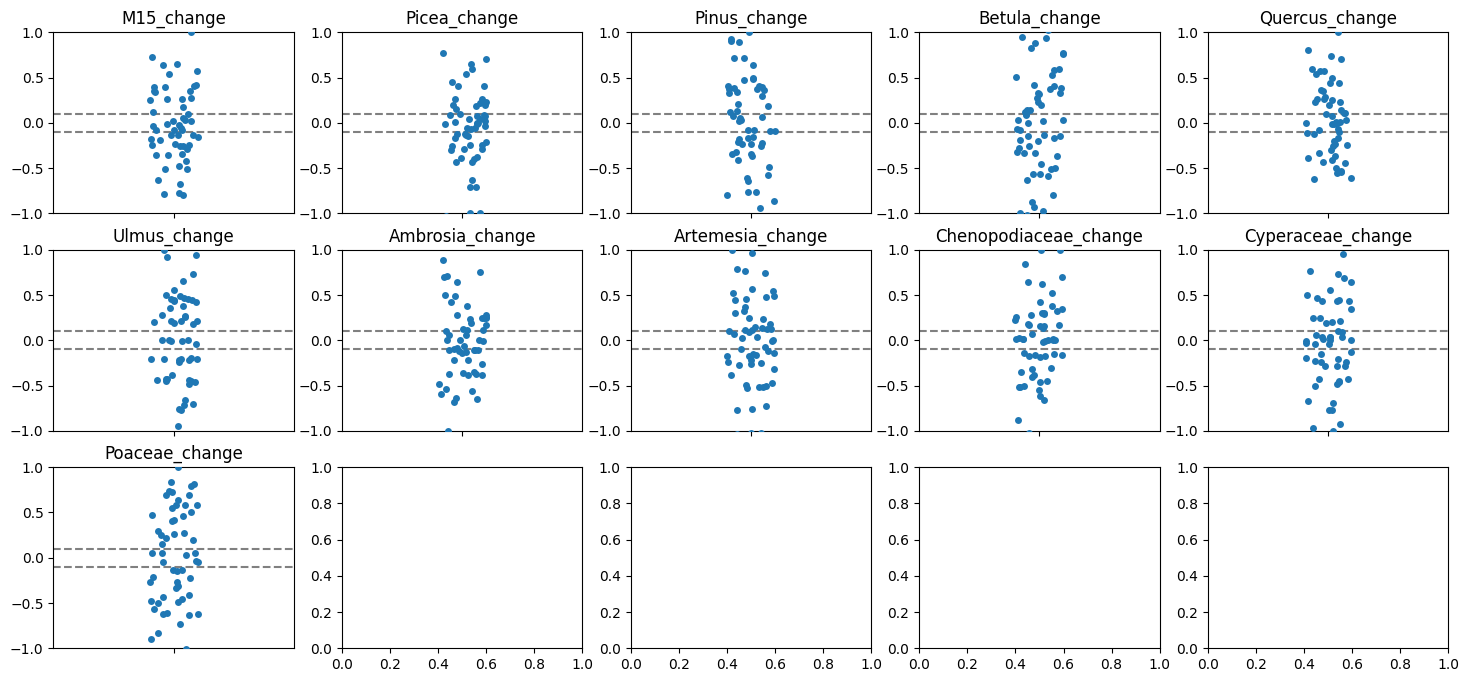

In [7]:
ncols = 5 
nrows = math.ceil(len([col for col in df.columns]) / ncols)

fig, my_grid = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,8))
fig_id = 0
# Compute change between time step
for col in df.columns:
    # Compute change
    df[col+"_prev"] = df[col].shift(1).iloc[1:]
    df[col+"_change"] = df[col] - df[col+"_prev"]
    #df = df.drop(columns=TARGET)
    df[col+"_change"] = df[col+"_change"] / df[col+"_change"].abs().quantile(0.9)

    ax = my_grid[int(fig_id / ncols)][fig_id % ncols]
    g = sns.stripplot (data=df, y=col+"_change", legend=False, ax=ax)
    ax.set(ylabel="")
    ax.set(ylim=(-1, 1))
    ax.axhline(MIN_UP,color='gray',ls='--')
    ax.axhline(MIN_DOWN,color='gray',ls='--')
    ax.title.set_text(col+"_change")
    df = df.drop(columns=col+"_prev")

    # Discretize change
    df[col+"_change"] = df[col+"_change"].apply(lambda x: -1 if x < MIN_DOWN else 0 if x < MIN_UP else 1)

    fig_id += 1

df

,M15,Picea,Pinus,Betula,Quercus,Ulmus,Ambrosia,Artemesia,Chenopodiaceae,Cyperaceae,...,Picea_change,Pinus_change,Betula_change,Quercus_change,Ulmus_change,Ambrosia_change,Artemesia_change,Chenopodiaceae_change,Cyperaceae_change,Poaceae_change
0,0,2,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,2,2,0,0,0,1,0,0,1,...,-1,1,1,-1,-1,0,-1,-1,0,0
2,0,2,2,0,0,1,0,1,0,1,...,0,-1,-1,1,1,-1,1,1,-1,0
3,1,2,0,1,1,0,0,1,1,0,...,-1,-1,1,1,-1,-1,0,1,0,0
4,2,2,1,0,0,0,0,0,0,0,...,1,1,-1,-1,1,0,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,2,0,2,1,2,1,2,0,0,...,1,-1,0,1,1,1,1,-1,-1,1
58,0,2,0,2,0,2,0,2,2,0,...,-1,1,-1,-1,1,-1,0,1,0,1
59,0,2,2,0,0,0,2,2,2,0,...,-1,1,-1,0,-1,1,1,1,0,-1
60,0,2,1,0,0,2,1,0,2,1,...,1,-1,-1,0,1,-1,-1,-1,1,0


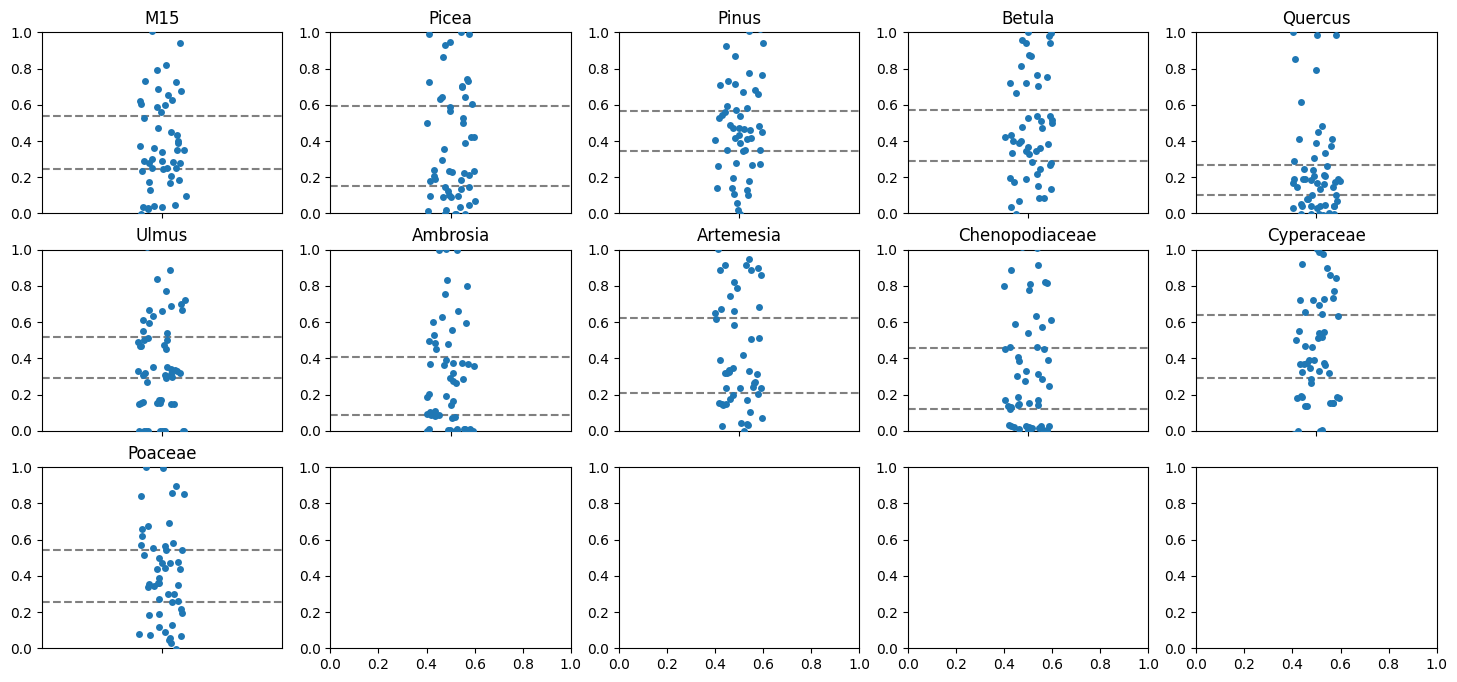

In [8]:
ncols = 5 
nrows = math.ceil(len([col for col in df.columns if "_change" not in col]) / ncols)

fig, my_grid = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,8))
fig_id = 0

# Discretize value
for col in [col for col in df.columns if "change" not in col]:
    df[col] = (df[col]-df[col].quantile(0.1)) / (df[col].quantile(0.9)-df[col].quantile(0.1))

    ax = my_grid[int(fig_id / ncols)][fig_id % ncols]
    g = sns.stripplot (data=df, y=col, legend=False, ax=ax)
    ax.set(ylabel="")
    ax.set(ylim=(0, 1))
    ax.axhline(df[col].quantile(0.66),color='gray',ls='--')
    ax.axhline(df[col].quantile(0.33),color='gray',ls='--')
    ax.title.set_text(col)
    
    df[col] = df[col].apply(lambda x: 0 if x < df[col].quantile(0.33) else 1 if x < df[col].quantile(0.66) else 2)

    fig_id += 1


# Compute change of charcoal
#df["charcoal_change"] = df[CHARCOAL_ID].shift()
#df["charcoal_change"] = df["charcoal_change"] - df[CHARCOAL_ID]

#df = df[(df["charcoal_change"] > -1) & (df["charcoal_change"] < 1)]
#sns.catplot(data=df, y="charcoal_change")

#df["charcoal_change"] = df["charcoal_change"].apply(lambda x: "up" if x > 0 else "down")
#df["charcoal_change"] = df["charcoal_change"].apply(lambda x: x > 0)
#df = df.drop(axis=1, columns=CHARCOAL_ID)
df = df.dropna()

display(df)

df.to_csv(DISCRETE_DATA_PATH, index=False)

# Analysis

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

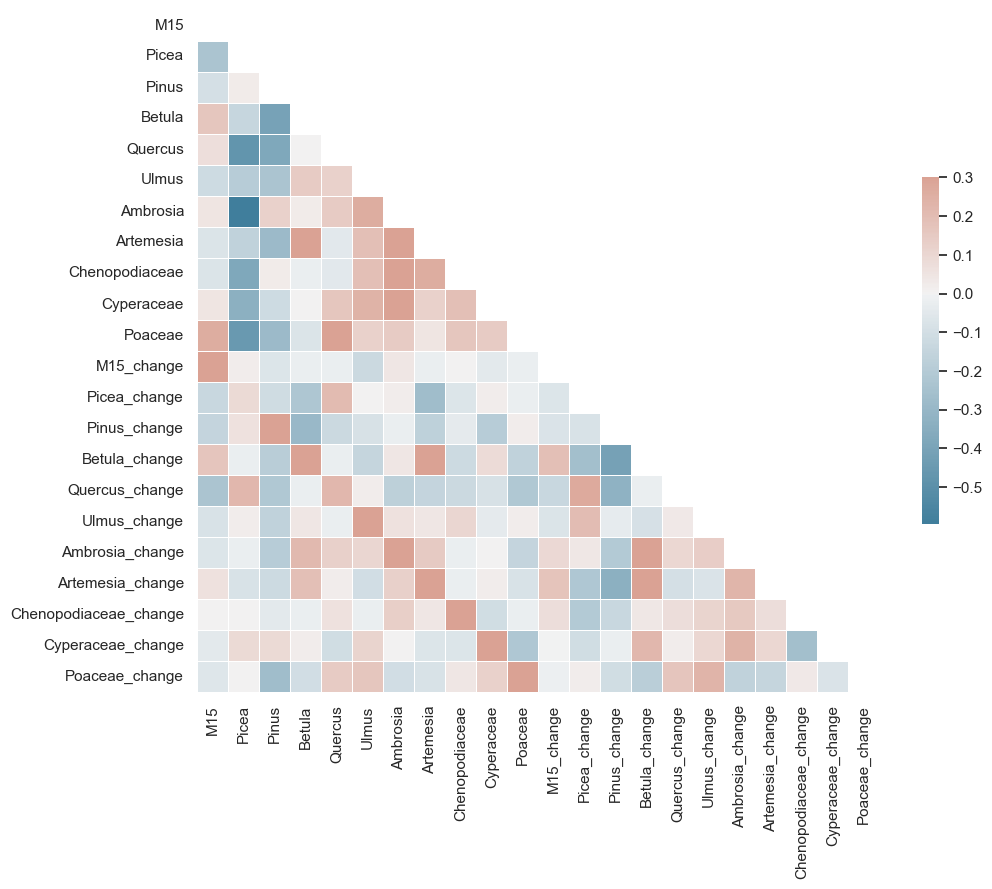

In [10]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.select_dtypes(include=["number"]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})